# Module 8 - Final Project

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. In module4 (Database) there also was an abbreviated example data story.  Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for you data story to a single, relatively simple perspective.

- Identify already available data that affords addressing your problem.  If using completely new data, know it well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments that explain the purpose of the operation(s).


Make your project unique by

- Comparing two or more different statistical/machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources.
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write a story around it.




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview the story you hope to uncover.

### Data: 

- The data I chose is house rent data for some housing in India. 
- [The Data](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?resource=download)

Recent soaring housing costs in the United States make me wonder if people in India are facing a similar increase in housing costs. While I am not going to try to compare the US market to the Indian market, I would like to investigate what people in India should look for in housing listings in order to get into a "Nice" but affordable living situation. 

Questions before moving forward: 

- What defines a 'Nice' living situation? 
- What is affordable for Indians? 
- Look to uncover what type of units are priced better for a similar size and number of bathrooms and bedrooms. 

- Could I find some data on Indian City statistics to couple with this housing data. 
- What about finding some data on Indian income and what defines middle or lower middle class Indians. 

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

I hope to speak to the middle class or lower income population of india and help them uncover oppurtunities for better housing. 

Through this story I would like to uncover what types of housing indians should look for in order to get a nice place to live in while keeping that expense affordable. 


## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name(s) of the file(s) that are now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [1]:
# Importing the packages needed to process and display this data. 


import pandas as pd
from plotnine import *
import numpy as np
from scipy import stats
from sklearn import linear_model


##### Dataset Glossary (Column-Wise)
- BHK: Number of Bedrooms, Hall, Kitchen.
- Rent: Rent of the Houses/Apartments/Flats.
- Size: Size of the Houses/Apartments/Flats in Square Feet.
- Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
- Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
- Area Locality: Locality of the Houses/Apartments/Flats.
- City: City where the Houses/Apartments/Flats are Located.
- Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
- Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
- Bathroom: Number of Bathrooms.
- Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [2]:
housing = pd.read_csv('House_Rent_Dataset.csv') #Reading in the data to a dataframe
housing.head() # Displaying the first 5 rows of the data. 

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
housing.dtypes # Looking at the different data types of the columns. 

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

#### Initial Thoughts: 

- Looks like a pretty clean data set to work with. 
- Split date into year, month, day columns
- Floor column needs to be cleaned up. (Get floor and Total Floors) 
- Consider defining type of building based on total number of floors. 

#### Questions about this data: 

- What do the different types of area type actually represent?  
    - [Definitions and Examples for Super Area, Carpet Area, and Build Area](https://housing.com/news/real-estate-basics-part-1-carpet-area-built-up-area-super-built-up-area/)
- Units of currency for rent?
    - Rupee
- Units of space say in sq ft., but when looking at the minimum for size it says 10. This seems awfuly small. Maybe just an error in inputting. 

In [4]:
housing.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


#### What is a reasonable Rent for a low to middle class Indian? 

- Doing some research into what defines lower class to middle class living in India. [Link](https://www.quora.com/What-incomes-define-upper-middle-and-rich-classes-in-India)
    - Lower class (Earn up to 2.5 lakhs (100,000 Rupee's) per year)
    - Middle class (Earn up to 9 lakhs per year) (also depends on the city: High Cost of Living vs. Low Cost of Living)
    - Getting an idea from some google searching about what is an approperiate ammount to spend on rent for a given person. Appears that you should spend at maximum 30% of your gross income on your rent or housing costs. [Article](https://www.nerdwallet.com/article/finance/money/how-much-should-i-spend-on-rent)

In [5]:
# Assuming the 30% rule in housing costs I wanted to calculate the maximum rent for both the lower class and middle
# class people in India. 

lower_class_max_rent = 2.5 * 100000 * .3 / 12
middle_class_max_rent = 9 * 100000 * .3 / 12

print(f"The maximum monthly rent for a lower class Indian is: {lower_class_max_rent} rupees.")
print(f"The maximum monthly rent for a middle class Indian is: {middle_class_max_rent} rupees.")

The maximum monthly rent for a lower class Indian is: 6250.0 rupees.
The maximum monthly rent for a middle class Indian is: 22500.0 rupees.


In [6]:
# Now that I have completed some of the initial research to help me better understand this data set,
# let's start to clean up some of the columns. 

# First I will split the date into multiple columns. 
housing[["Year", "Month", "Day"]] = housing["Posted On"].str.split(pat="-", expand=True)

# Now split floor into multiple columns
housing[['Floor On', 'Total Floors']] = housing['Floor'].str.split(pat=' out of ', expand=True)

# Get rid of the columns we are no longer interested in because we split them. Rename the Floor Column
housing.drop(['Floor', 'Posted On'], inplace=True, axis=1)
housing.rename(columns = {'Floor On':'Floor'}, inplace = True)
housing.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Floor,Total Floors
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,05,18,Ground,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,05,13,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,05,16,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,07,04,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,05,09,1,2


In [7]:
# Get an idea for what values are present in this data set for floor and total floors.
# Will convert to integers for easier graphing eventually. 

print('Unique Floor Labels')
print(housing['Floor'].unique(), '\n')
print('Unique Total Floors Labels')
print(housing['Total Floors'].unique())

Unique Floor Labels
['Ground' '1' '2' '4' '3' '5' '7' '8' 'Upper Basement' '11'
 'Lower Basement' '6' '14' '43' '13' '18' '17' '9' '19' '60' '34' '12'
 '26' '25' '53' '16' '10' '39' '32' '47' '28' '20' '15' '65' '40' '37'
 '22' '21' '30' '35' '33' '44' '41' '46' '27' '45' '48' '50' '24' '23'
 '29' '49' '36' '76'] 

Unique Total Floors Labels
['2' '3' '1' '4' '5' '14' '8' '6' '19' '10' '7' '13' '78' '18' '12' '24'
 '31' '21' '23' '20' '9' '22' '58' '16' '66' '48' '40' '44' '42' '41' '60'
 '32' '30' '29' '89' '15' '11' '28' '17' '45' '35' '75' '38' '51' '43'
 '25' '27' '26' '76' '36' '37' '55' '68' '77' '50' '59' '62' '39' '52'
 '54' '33' '46' '85' '71' '81' '34' None]


In [8]:
# Looking to see how many null values there are in the Total Floors Colum and to see if I can fix that. 
housing[housing['Total Floors'].isnull()]

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Floor,Total Floors
2553,2,20000,400,Super Area,"Kasturba Niketan, Lajpat Nagar 2",Delhi,Unfurnished,Bachelors/Family,1,Contact Owner,2022,06,18,3,None
2883,1,18000,450,Carpet Area,"DDA Flat AD Block, Shalimar Bagh AD Block",Delhi,Furnished,Bachelors/Family,1,Contact Owner,2022,05,23,Ground,None
4490,3,15000,900,Super Area,"Malakpet, NH 9",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022,06,12,1,None
4560,3,15000,1270,Carpet Area,Tarnaka,Hyderabad,Furnished,Family,2,Contact Owner,2022,05,31,1,None


In [9]:
# Only four values that are none, so I will search and see if there are other values in this data set or google and 
# see if I can find the total floors. 
housing[housing['Area Locality']=='Kasturba Niketan, Lajpat Nagar 2'] # Only returned the one with None
# Googled and found this building has 11 floors
# Replacing the value to the correct number of floors. 
housing.loc[2553,'Total Floors'] = 11

# Will do the same process for the rest of the missing values
housing.loc[2883, 'Total Floors'] = 3
housing.loc[4490, 'Total Floors'] = 2
housing.loc[4560, 'Total Floors'] = 3

# Interesting when Looking at this there are different total floors for the same Area Locality. Either there is some 
# data being entered wrong or there are differnet buildings within the same Area Locality. This will give us a good
# idea as to where the appartment is in the building as a whole. 

In [10]:
# See if there are any null values in the rest of the data frame.

# Looped through each of the column names to check if any na values were present in that column and then printed the df
# did not like the long output and I am sure there are ways to clean up this code, but to do a quick check, 
# I was fine with it. Commented out the code to reduce clutter in this notebook. 

# for column in housing.columns:
#     nul_rows = housing[housing[column].isna()]
#     print(nul_rows)

# Nothing is Null and we have cleaned up the data to a point I am happy with. 

#### First Try at Data Cleaning: 

- Happy with the current state of this data and the research that I have done. 
- Future work to do: 
    - Would like to classify the type of building into 'single story', 'low rise', 'high rise', and 'skyscraper'
        - This could provide some additional details for analysis. 
    - One thought is that the higher that you are in a building, the more premium the rent. This is just from my lived experience. Would like to explore this relationship through data visualization. 
        - Would be interesting to create a column that gives you the relative height in the building as a percentage of the total floors. Way to sort of standardize or normalize the floor data. 
        
        
- Below will start to visualize and possibly incorporate these features into the data for more analysis. 

## Step 5: Filter Results and Build and Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). 

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

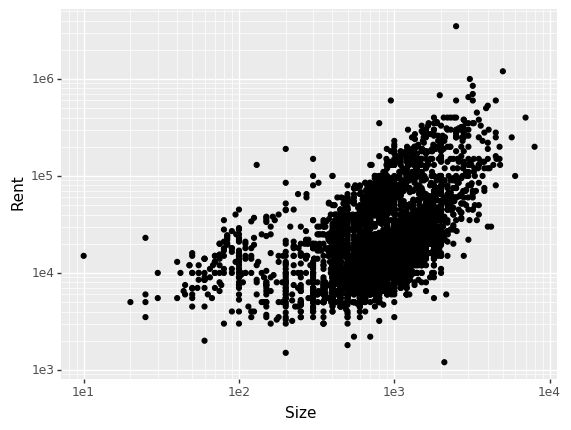

<ggplot: (-9223363304228301501)>

In [11]:
# Get an initial view of rent vs. size of a place.
p1 = (ggplot(housing, aes(x='Size', y='Rent'))) + geom_point()
p1

# Hard to read. Let's try and look at log scales and see if that helps 

p1 + scale_y_log10() + scale_x_log10()

# Lots of data points that may not be helpful to us as rent is more than most middle class people can afford. 
# Let's filter our data so that we only have rents up to our maximum alloted rent. 

In [12]:
# Filtering our dataframe to only get places that our middle class people can actually afford and is 
# within their budget. 

housing_aff = housing[housing['Rent']<= middle_class_max_rent].copy()

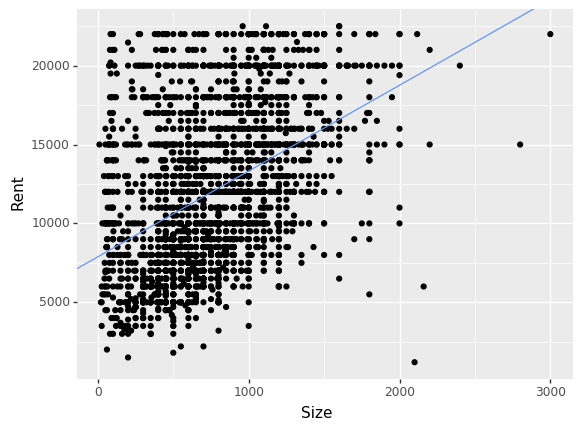

<ggplot: (-9223363304247115155)>

In [13]:
# computing the slope and intercept for the values in order to plot the best fit line for this data. 
x = housing_aff['Size'].values
y = housing_aff['Rent'].values
slope, intercept, _,_,_ = stats.linregress(x, y)

# This is easier to visualize what is going on.
p2 = ggplot(housing_aff, aes(x='Size', y='Rent')) + geom_point()
p2 + geom_abline(intercept = intercept, slope = slope, color = "cornflowerblue")



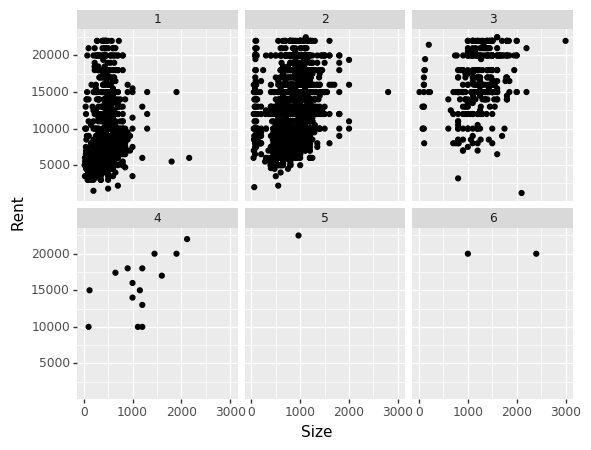

<ggplot: (8732607654860)>

In [14]:
# What if we wanted to see the distribution of points with number of rooms. 
p3 = ggplot(housing_aff, aes(x='Size', y='Rent')) + geom_point() + facet_wrap('BHK')
p3

# This is what I would have guessed. There are more options for housing in lower end of the price range for places
# that have a smaller number of bedrooms, Kitchens, and Halls. As the number of BHKs increase, there are fewer housing
# options or they get more expensive. 

In [15]:
# I am curious to see what effect the type of place (skyscraper, high rise, low rise, single story) has on the cost
# of the rent. I will have to do some data carpentry to find this out. I will also take a look at realitive position
# in the property. Is getting a lower floor in a high rise more cost effective vs. higher up in the building? 


# First there are values in our floors column that are ground, basement, and lower basement. Will change to 
# floor 0, -1, and -2 respectivly. 

housing_aff = housing_aff.replace('Ground', 0)
housing_aff = housing_aff.replace('Upper Basement', -1)
housing_aff = housing_aff.replace('Lower Basement', -2)

# Need to convert some of these values to numeric datatype to make it easier to work with
cols = ['Floor', 'Total Floors', 'Year', 'Month', 'Day']
housing_aff[cols] = housing_aff[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Get Tpye of building. Floor: 1 - Single Story, Total Floors: 2-8 - Low Rise, Total Floors: 9-35 - High Rise
# Total Floors: 36-Up - Skyscraper
bins = [0, 1, 8, 35, 100] # Selecting the bins we want to use and their limits
category = ['Single Story', 'Low Rise', 'High Rise', 'Skyscraper'] # Giving the various bins names for building types.
housing_aff['Building Type'] = pd.cut(housing_aff['Total Floors'], bins, labels=category)

# Now I want to create a column for realitive height in the building. 
housing_aff['Realitive Height'] = housing_aff['Floor']/housing_aff['Total Floors']
# Looking at the immediate results, buildings with very few floors show a large realitive height. Can look at this
# data inclusivly and also filter out high rises and skyscrapers to see if the data shows anything different then. 

# Create Categories again for the relative height. 
bins2 = [-5,-0.9999999, .2, .4, .6, .8, .95, 1] # Selecting the bins we want to use and their limits
category2 = ["Below Ground", 'Lower', 'Lower Middle', 'Middle', 'Upper Middle', 'Upper', 'Top'] # Giving the various bins names for realitive height descriptions
housing_aff['R_height_desc'] = pd.cut(housing_aff['Realitive Height'], bins2, labels=category2)




In [16]:
housing_aff.head()
# housing_aff.describe()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Floor,Total Floors,Building Type,Realitive Height,R_height_desc
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18,0,2,Low Rise,0.000000,Lower
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13,1,3,Low Rise,0.333333,Lower Middle
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16,1,3,Low Rise,0.333333,Lower Middle
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4,1,2,Low Rise,0.500000,Middle
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9,1,2,Low Rise,0.500000,Middle


#### Data Cleaning and Carpentry Final Results

- I am happy with where the data cleaning and carpentry is at. 
- I realize that i could have applied the categories to the entire data set in order to see more trends. I decided to just move on with the housing these classes of individuals and families could reasonably afford. If wanting to explore more, it woudl not be hard to move the last cell of code further up in the notebook and run the code on all of the data. 

- Now onto visualizations to see what information I can pull out of this dataset. 


## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

#### Initial Visualizations to Make

Helpful for me to list my initial goals and thoughts and then work and explore from there. 

- Size vs. Rent wrapped for different cities. 
- Size vs. Rent wrapped for number of living spaces, color coded with number of bathrooms. 
- Size vs. Rent encoded with building type in color or size. 
- Relative height vs. Rent encode with building type or size to see if there is a difference. Could even wrap this. 
- Size vs. Rent wrapped or encoded with floor type. 
- Size vs. Rent encoded for point of contact. 
- Size vs. Rent encoded for prefered tennant. 

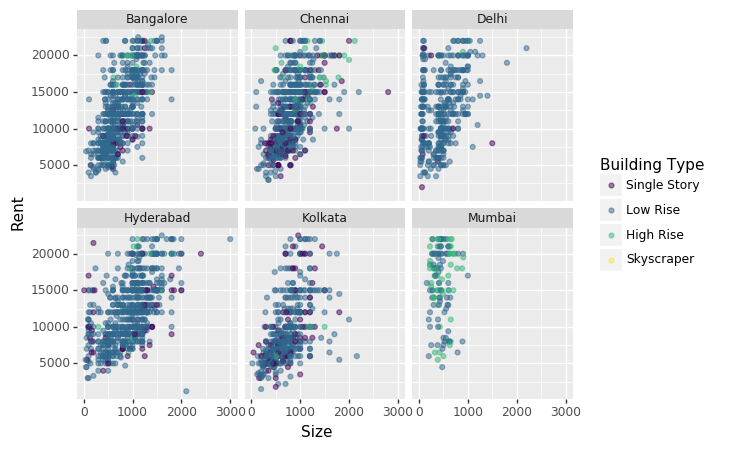

<ggplot: (-9223363304248925566)>

In [17]:
ggplot(housing_aff, aes(x='Size', y='Rent')) + \
    geom_point(aes(color='Building Type'), alpha=0.5) + \
    facet_wrap('City')

# This makes me curious in the ammount of places that are for rent in each city based on different prices.

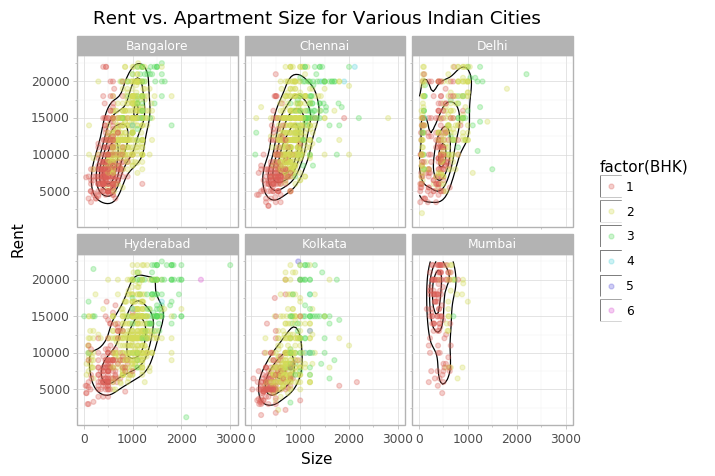

<ggplot: (8732605600169)>

In [40]:
# Another way to visualize the relative amount of housing options in each city. This time added color to see the number
# of Bedrooms, Halls, and Kitchens in the units. 
ggplot(housing_aff, aes(x='Size', y='Rent')) + \
    geom_density_2d()+ geom_point(aes(color='factor(BHK)'), alpha=0.3) +\
    facet_wrap('City') + theme_light() + labs(title='Rent vs. Apartment Size for Various Indian Cities')

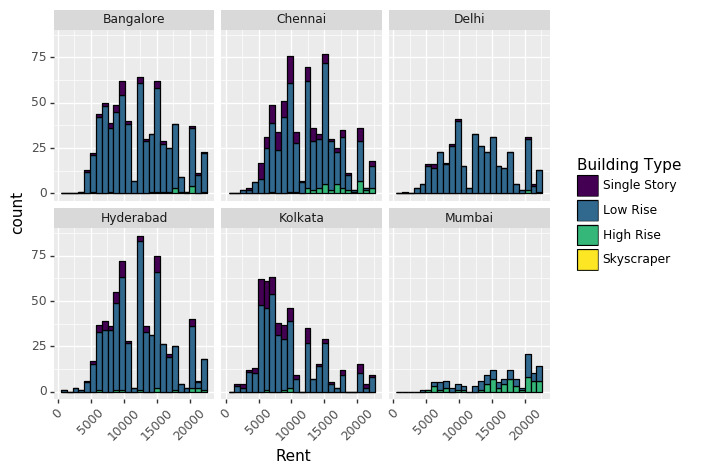

<ggplot: (8732605406258)>

In [19]:
# This plot gives us an idea as to ho many units at various prices are available in each city. 

ggplot(housing_aff, aes(x="Rent")) + geom_histogram(aes(fill='Building Type'), color='black', bins=25) + facet_wrap('City') +\
    theme(axis_text_x = element_text(angle = 45))

In [20]:
# Grouping the rents by city and calculating the mean, median, and count of data points for each city. 

housing_aff[['City', 'Rent']].groupby(['City']).agg(['mean','median','count'])

# Looks like Bangalore, Chennai, and Hyderbad all have about the same mean rent and number of units available in 
# the price range of most middle class Indians. 

# Kolkata has a lower mean rent while Delhi has fewer units available in this price range. 
# Mumbai has a higher median rent at 17000 and much lower availablility in this price range. 

Rent             
                   mean median count
City                                
Bangalore  12305.269956  12000   689
Chennai    12380.702624  12000   686
Delhi      12693.817010  12300   388
Hyderabad  12287.387387  12000   666
Kolkata     9375.406639   8000   482
Mumbai     15994.896296  17000   135

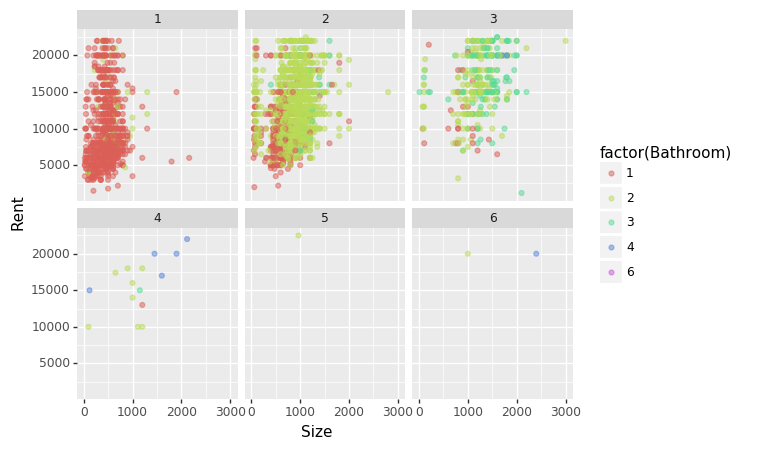

<ggplot: (-9223363304235750435)>

In [21]:
# Trying to get an idea of price vs. size of appartment by number of BHK with added color to show number of bathrooms.
ggplot(housing_aff, aes(x='Size', y='Rent')) + \
    geom_point(aes(color='factor(Bathroom)'), alpha=0.5) + \
    facet_wrap('BHK')

# Verry few housing options for 4-6 BHK places. Will look at some histograms but will filter for up to 3 only to make
# the plots a bit easier to read. 

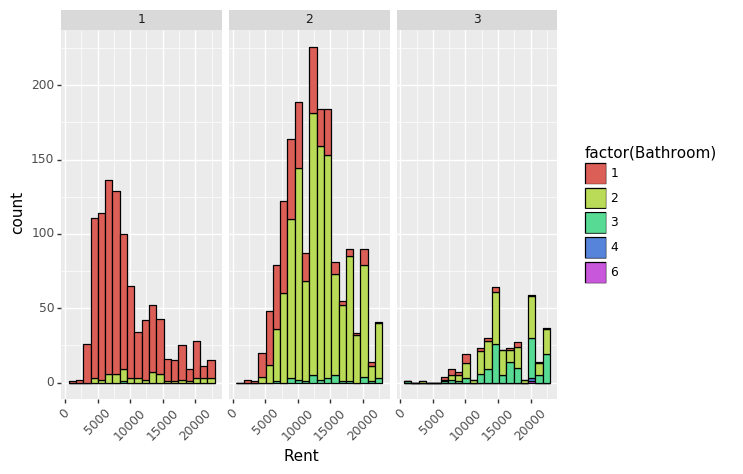

<ggplot: (-9223363304249562978)>

In [22]:
# Looking at number of places available based on BHK and their relative rents. Added a fill color for bathrooms. 

ggplot(housing_aff[housing_aff['BHK']<4], aes(x='Rent')) + \
    geom_histogram(aes(fill='factor(Bathroom)'),color="black",  bins=20) + \
    facet_wrap('BHK') + theme(axis_text_x = element_text(angle = 45))

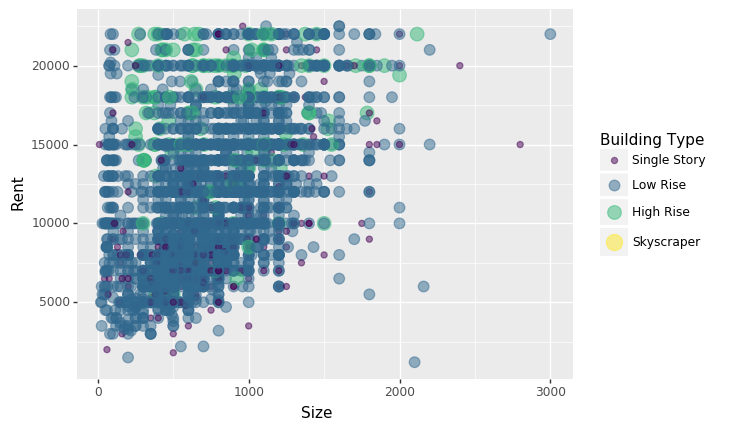

<ggplot: (8732605792874)>

In [23]:
# Wanted to see if the type of building had any effect on the price of the unit. Does not appear so, but we can check
# with a boxplot. 
ggplot(housing_aff, aes(x='Size', y='Rent')) + \
    geom_point(aes(color='Building Type', size='Building Type'), alpha=0.5)

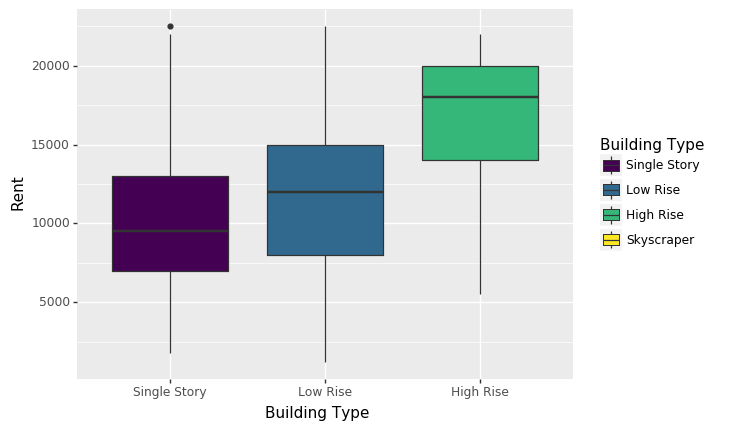

<ggplot: (-9223363304248925475)>

In [24]:
# It appears that living in a high rise may be more expensive overall. 
ggplot(housing_aff, aes('Building Type','Rent')) + geom_boxplot(aes(fill='Building Type'))


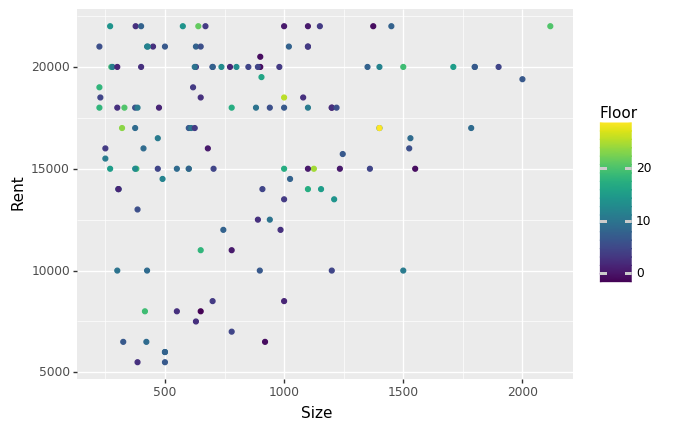

<ggplot: (8732604903572)>

In [25]:
# Does not appear that living lower or higher in a high rise makes a difference in pricing. These may be nicer
# buildings overall which lead to the marked increase in housing costs in highrises
ggplot(housing_aff[housing_aff['Building Type']=="High Rise"], aes(x='Size', y='Rent')) + \
    geom_point(aes(color='Floor'))

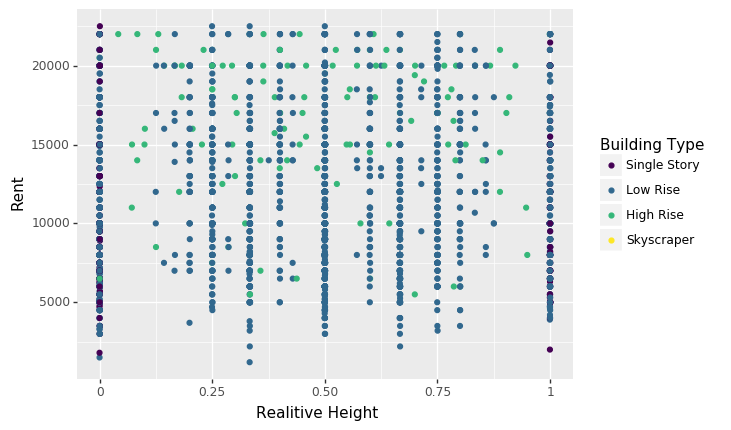

<ggplot: (8732604903628)>

In [26]:
# Trying to see wether or not living higher up in a building has a marked inpact on the price of the rental unit. 

ggplot(housing_aff, aes(x='Realitive Height', y='Rent')) + \
    geom_point(aes(color='Building Type'), alpha=0.5)

# Somehow some data got mixxed up or the floor and buildings total floors are not completely correct. Let's filter
# our df and only get values between 0 and 1

ggplot(housing_aff[(housing_aff['Realitive Height']>=0) & (housing_aff['Realitive Height'] <=1)], aes(x='Realitive Height', y='Rent')) + \
     geom_jitter(aes(color='Building Type'))

# Nothing jumps out here. Seems that there is not a large correlation between either of these factors. 

In [27]:
# After seeing the above plot, I wanted to take a quick look at a correlation matrix to see if anything jumped out. 
# Looking at this, the three biggest factors that are impacting the Rent are: 
# BHK, Size, and Bathroom

# I would be really interested in seeing if I ran this with the entire data set and saw what jumped out. Maybe I will
# later in the notbook for soem extra exploration with the entire data set. 
housing_aff.corr()

,BHK,Rent,Size,Bathroom,Year,Month,Day,Floor,Total Floors,Realitive Height
BHK,1.000000,0.437151,0.613993,0.682169,NaN,0.029803,-0.033485,-0.010264,0.004023,-0.021771
Rent,0.437151,1.000000,0.435682,0.478919,NaN,0.083929,-0.055975,0.227272,0.267532,0.076273
Size,0.613993,0.435682,1.000000,0.610272,NaN,0.082130,-0.055969,-0.000815,0.005887,-0.032145
Bathroom,0.682169,0.478919,0.610272,1.000000,NaN,0.071164,-0.059346,0.082011,0.085422,0.031327
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.029803,0.083929,0.082130,0.071164,NaN,1.000000,-0.478821,0.030000,0.043800,0.015133
Day,-0.033485,-0.055975,-0.055969,-0.059346,NaN,-0.478821,1.000000,-0.016387,-0.016655,-0.007301
Floor,-0.010264,0.227272,-0.000815,0.082011,NaN,0.030000,-0.016387,1.000000,0.776397,0.522179
Total Floors,0.004023,0.267532,0.005887,0.085422,NaN,0.043800,-0.016655,0.776397,1.000000,0.091573
Realitive Height,-0.021771,0.076273,-0.032145,0.031327,NaN,0.015133,-0.007301,0.522179,0.091573,1.000000


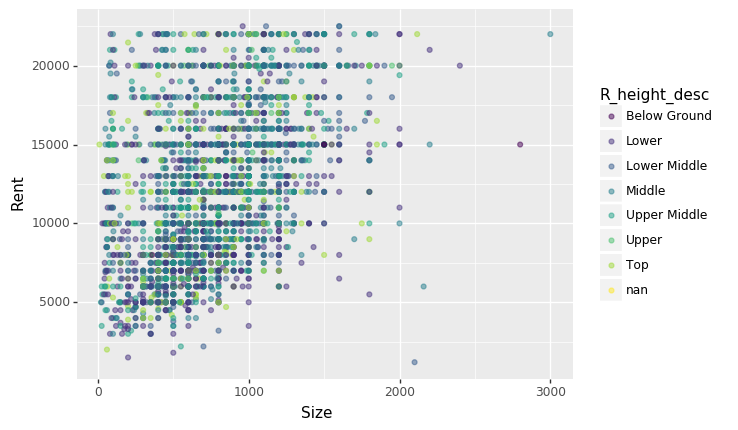

<ggplot: (-9223363304249947511)>

In [28]:
# Continuing along with some exploration plots. 


# Again doing a Rent vs. Size scatter plot and color coding with the relative height description that I created. 
ggplot(housing_aff, aes(x='Size', y='Rent')) + \
    geom_point(aes(color='R_height_desc'), alpha=0.5)

# Does not look like there are any groupings in this data. Can look at hisograms to better get an idea of the distribution



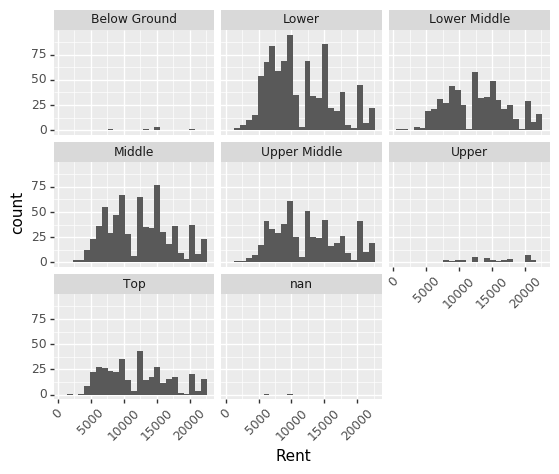

<ggplot: (8732604825727)>

In [29]:
# Plot showing price distributions for properties based on where the apartment is located within a building heightwise.
ggplot(housing_aff, aes(x='Rent')) + \
    geom_histogram(bins=25) + facet_wrap('R_height_desc') + \
    theme(axis_text_x = element_text(angle = 45))

# Nothing jumps out here they all look to have about a similar distribution. 


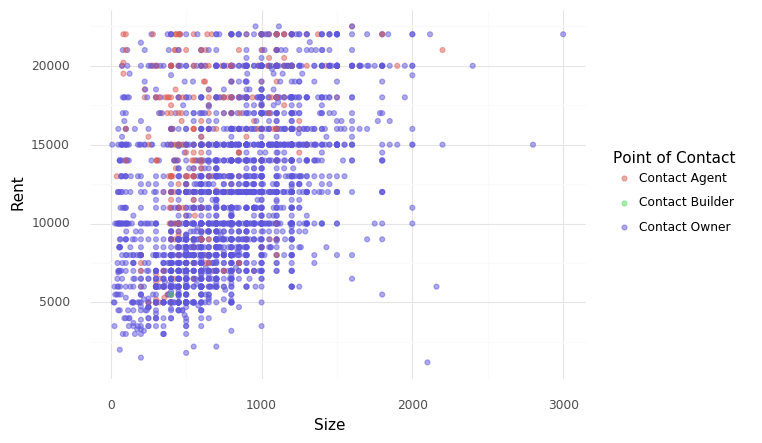

<ggplot: (-9223363304249902525)>

In [30]:
# Wanted to see if point of contact had any effect on the housing rent prices. 

ggplot(housing_aff, aes(x='Size', y='Rent')) + \
    geom_point(aes(color='Point of Contact'), alpha=0.5) + theme_minimal()

# From this graph it looks like you can get a bigger place for the same rent if you contact an owner vs. an agent. 

# Will have to dig into this a bit more to see if this is actually true or not. 

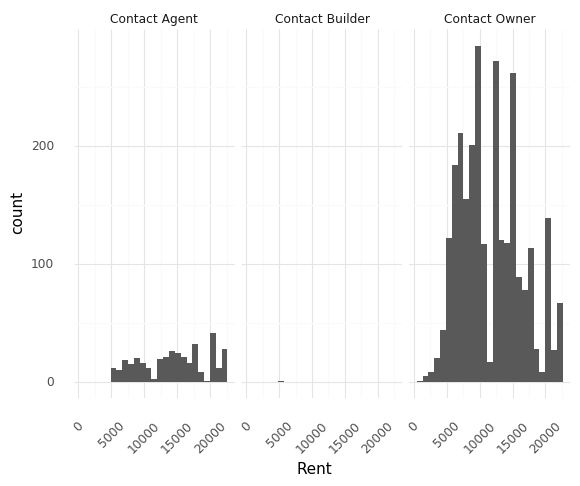

<ggplot: (-9223363304249317565)>

In [31]:
# Plotting a distribution of rental properties available segregated by point of contact. 

# Distributions look similar, but would be interesting to look at some actual statistics. 

ggplot(housing_aff, aes(x='Rent')) + \
    geom_histogram(bins=25) + facet_wrap('Point of Contact') + theme_minimal() + \
    theme(axis_text_x=element_text(angle = 45))


In [32]:
# Running some quick stats on the mean of the different contact points.
print(housing_aff[['Point of Contact', 'Rent']].groupby(['Point of Contact']).agg(['mean', 'count']))


                          Rent      
                          mean count
Point of Contact                    
Contact Agent     14508.754237   354
Contact Builder    5500.000000     1
Contact Owner     11749.071721  2691


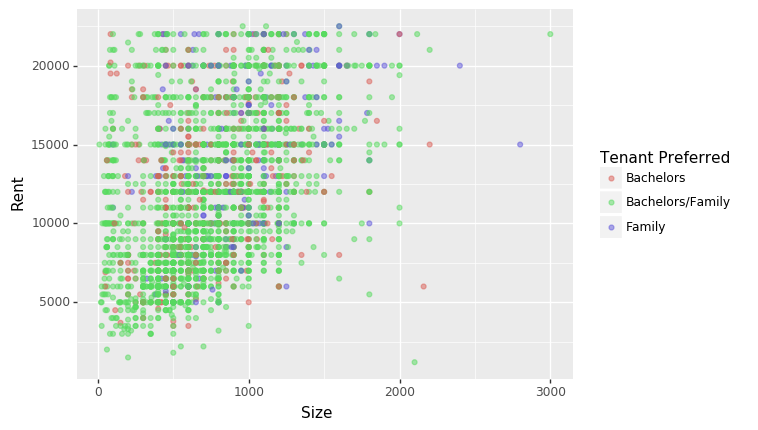

<ggplot: (8732605589568)>

In [33]:
# Quick look to see if the Prefered Tenant has any affect on the price vs. size of the appartments. 
ggplot(housing_aff, aes(x='Size', y='Rent')) + \
    geom_point(aes(color='Tenant Preferred'), alpha=0.5)

# Looks like everything is mixed together pretty well. 

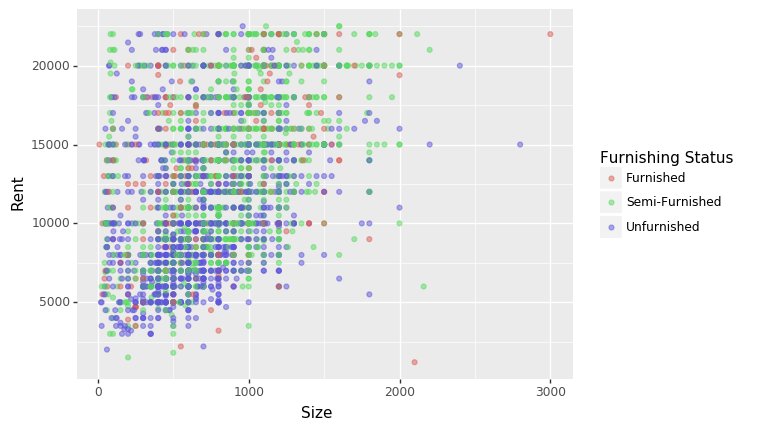

<ggplot: (-9223363304249097177)>

In [34]:
# Getting an idea of furnished vs. unfurnished status and price. 
ggplot(housing_aff, aes(x='Size', y='Rent')) + \
    geom_point(aes(color='Furnishing Status'), alpha=0.5)

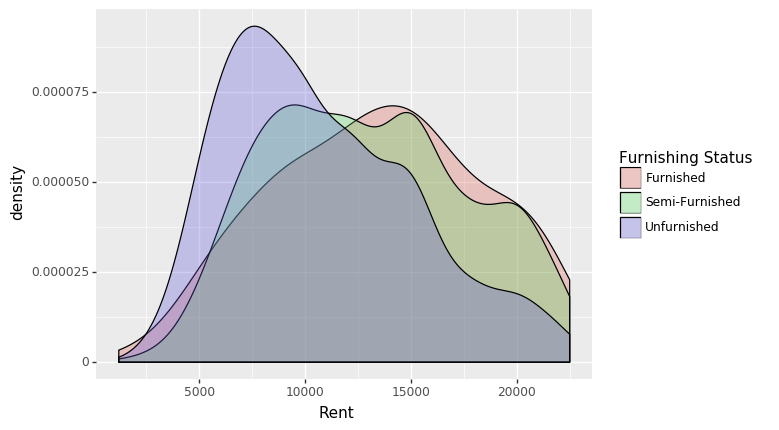

<ggplot: (-9223363304249917815)>

In [35]:
# This is a nice comparison. Appears that you will on average pay less for an unfurnished place vs. a furnished place.

ggplot(housing_aff, aes(x='Rent', fill='Furnishing Status')) + \
    geom_density(alpha=0.3)

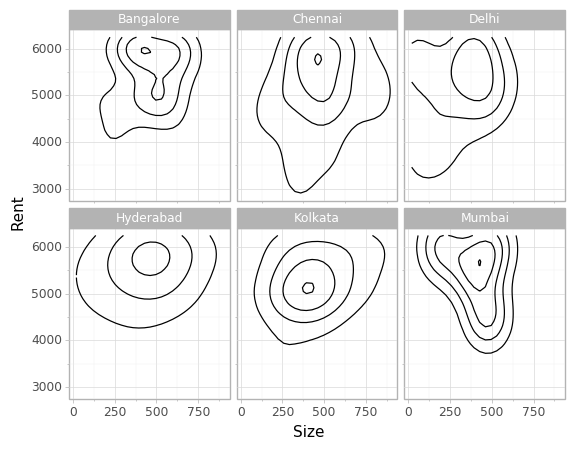

<ggplot: (8732605209713)>

In [36]:
# Want to tak a quick look at lower middle class affordability and see if I can provide any insights there. 

low_income_options = housing_aff[housing_aff['Rent']<=lower_class_max_rent].copy()

ggplot(low_income_options, aes(x='Size', y='Rent')) + \
    geom_density_2d()+\
    facet_wrap('City') + theme_light()

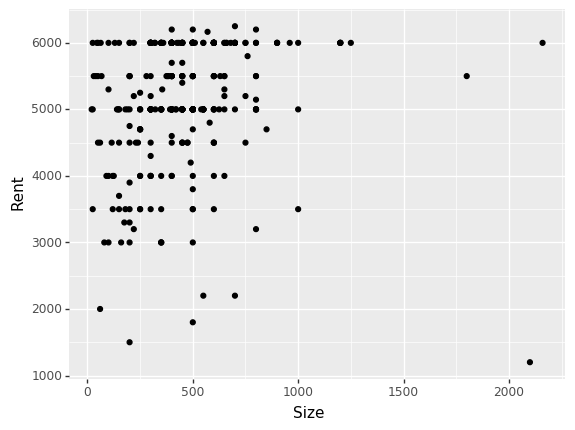

<ggplot: (8732605770346)>

In [37]:
ggplot(low_income_options, aes(x='Size', y='Rent')) + geom_point() # Looking at size vs. rent for lower income options

In [ ]:
# Going to just focus on Middle class housing options to minimise scope of this project. 

### Regression Model

- Going to build a model to see if I can predict the rent of an appartment based on its size, number of rooms, number of bathrooms, and city that it is located in. 


In [42]:
housing_aff.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Floor,Total Floors,Building Type,Realitive Height,R_height_desc
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18,0,2,Low Rise,0.000000,Lower
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13,1,3,Low Rise,0.333333,Lower Middle
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16,1,3,Low Rise,0.333333,Lower Middle
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4,1,2,Low Rise,0.500000,Middle
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9,1,2,Low Rise,0.500000,Middle


In [41]:
train = housing_aff.sample(frac=7/10, random_state = 1) #splitting data into training and testing data
test = housing_aff.drop(train.index)

In [44]:
# Creating training and testing x and y data. Our model will try to predict rent based on the Size of the apartment, 
# number of bathrooms and number of BHKs. 

train_X = np.asarray(train[['Size', 'Bathroom', 'BHK']])
train_y = np.asarray(train['Rent'])

test_X = np.asarray(test[['Size', 'Bathroom', 'BHK']])
test_y = np.asarray(test['Rent'])

# Create the model.
regr = linear_model.LinearRegression()

# Train the model
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
# Seeing how well our model does with the test set. 
regr.score(test_X, test_y)

# Does not do very well. Let's see if we can change this model slightly to make some improvements. Let's add the city
# in the model to see if knowing the city will be able to help us better predict the rent price. 

0.2579093102500605

In [52]:
# Get dummy variables for the Cities. 
city_dum = pd.get_dummies(housing_aff['City'])

In [53]:
housing_reg = pd.concat([housing_aff, city_dum], axis=1)
housing_reg.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,...,Total Floors,Building Type,Realitive Height,R_height_desc,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,...,2,Low Rise,0.000000,Lower,0,0,0,0,1,0
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,...,3,Low Rise,0.333333,Lower Middle,0,0,0,0,1,0
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,...,3,Low Rise,0.333333,Lower Middle,0,0,0,0,1,0
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,...,2,Low Rise,0.500000,Middle,0,0,0,0,1,0
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,...,2,Low Rise,0.500000,Middle,0,0,0,0,1,0


In [54]:
# Spliting the data for the second model

train2 = housing_reg.sample(frac=7/10, random_state = 1)
test2 = housing_reg.drop(train.index)

In [56]:

# Creating training and testing data for our linear model. 

train_X2 = np.asarray(train2[['Size', 'BHK', 'Bathroom', 'Bangalore', 'Chennai', 'Hyderabad','Kolkata','Mumbai']])
train_y2 = np.asarray(train2.Rent)

test_X2 = np.asarray(test2[['Size', 'BHK', 'Bathroom', 'Bangalore', 'Chennai', 'Hyderabad','Kolkata','Mumbai']])
test_y2 = np.asarray(test2.Rent)

In [57]:
# Fit the model to our training data. 

regr.fit(train_X2, train_y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
# Quick regression score to see if I made any improvements. 

regr.score(test_X2, test_y2)

# Seems that accounting for the city adds a 12% increase in the acuracy of the model. 

0.3710195038611447

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel (the slack course channel). 

Feel free to post more examples for people to look at and provide feedback. Your classmates will be vital providers of feedback in this process. Utilize them.

#### Conclusions

Finding affordable quality housing can be a challenge for many people, but it is more challenging the less wealthy you are. When looking for a place to live, keeping a few key factors in mind will help you find a place within your budget while also maximizing your quality of housing. Finding a place of living within your budget is critical for long term financial wellbeing and keeping your housing expenses within 30% of your gross income is a good rule of thumb. In order to better serve middle class Indians, most of the data I looked into during this exploration is at or below 30% of an average middle class Indian's wages. 

Key factors influincing the price of housing are Size, Number of Rooms, and Number of bathrooms. One other small factor that influences housing pricing is the type of property this apartment is located in. Living in a single story building or low rise is generally more affordable than living in a high rise. If you already have furnishings for an appartment, looking for an unfurnished appartment will give you more bang for your buck. 

If you have flexibility in choosing a city to live in, Chennai, Bangalore, and Hyderbad have a mean rent of around 12300 rupees and all have about 670 - 680 units available that would be in a good price range for middle class Indians. Delhi has a similar rent range, but has only about half of the available units as the other cities. Kolkata has a lower mean rent overall at 9375 rupees, where Mumbbai has a higher median rent at 17000 rupees. Mumbai has only 135 units availalbe in this price range. 

Keeping these points in mind can help you find an affordable housing option for you and your family. Each person's living preferences are unique, and understanding your own needs will help you find the right housing fit for you. 



# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>

#### Project Definitions, Requirements and Expectations 
- Really important to define the scope of your project. I found myself coming back to my scope to provide guidance. 
- It is easy to get sucked in different directions when combing through the data and creating visualizations. Having that north star (project scope) can help you stay on track in the project. 
- Projects can spiral very quickly and become way too broad if not focused enough. I had to reduce my scope of project to just looking at middle class housing options to keep the project a reasonable size and length. 

#### Data Acquisition Curation and Source Code Management
- Had to ensure that I could use the data.
- Not being familiar with India’s housing, I had to do some research to better understand this data.

#### Data Shaping and Carpentry
- Had to extract some data from columns to get the total floors and floor of the apartment. 
- I also did some calculations to explore if rent was correlated with the relative height an apartment was located within a particular building. 
- I also used some data shaping to categorize the type of building an apartment was in using the cut() function.

#### Exploratory Data Analysis and Visualization
- Made a ton of graphs to see what trends stand out in this data set. 
- As I made graphs, I would see something that sparked a question which led to making more graphs to look at various factors. I think this iterative question-action approach is crucial in this exploratory data stage. 

#### Statistical / Machine Learning Model Planning Building and Testing
- This came towards the very end of my project. I wanted to really provide insights for the Indian people and having graphs and charts that show what opportunities are available for their housing was more important than creating a machine learning model to predict the rent price for a particular unit. 
- I did build a quick model to see what I could come up with. The model performed quite poorly the first time, but when I included city, it still did not do great but was able to get a 12% increase in the accuracy of my model. 

#### Model Validation Visualization and Interpretation
- Did not spend as much time on this step. I tested my model, but ultimately went more with a descriptive statistics approach in this project to provide more information to the middle class of India. 

#### Data Story / Product Development and Reporting
- Created visualizations that will help middle class Indians find affordable housing within their budget. 

#### Model Deployment and Monitoring
- I have reflected a lot throughout this project and while my project was not perfect, I am happy with the overall scope and state of the project. 
- If I were to do this project again, I may focus on the lower class population to help uncover any insights into the types of housing they should look for to get an affordable apartment. 


# Save your notebook, then `File > Close and Halt`